Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
231 70


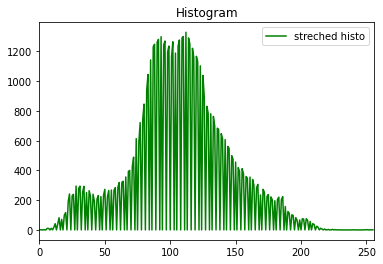

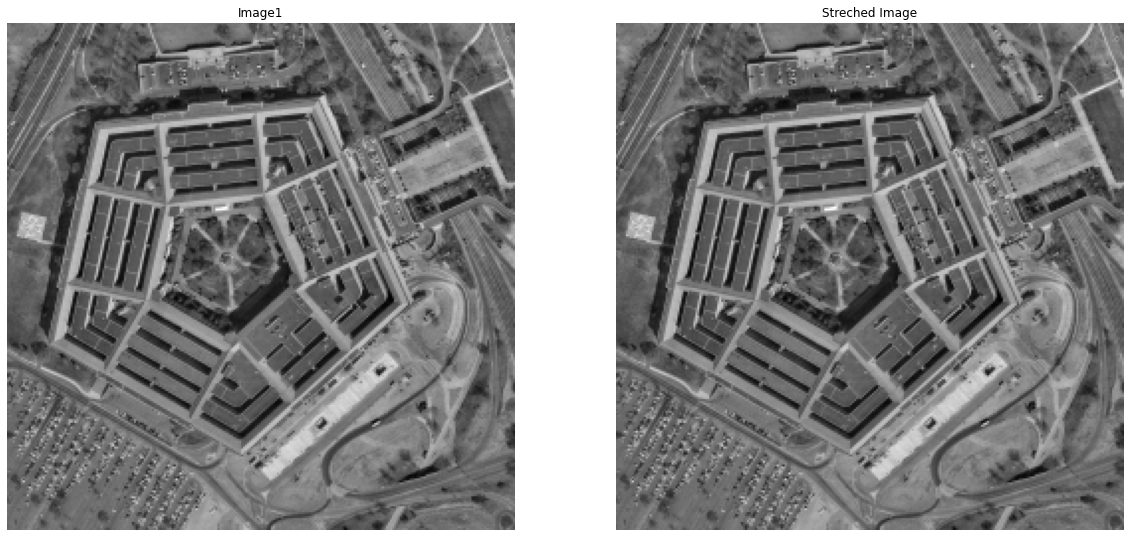

In [3]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/pentagon.bmp')

# color영상을 gray영상으로 만들기
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
output_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

def saturation(value): #saturation함수로 정의하기
    if(value>255):
       value = 255;
    return value 

Nmax=255
Nmin=0
max = 0
min = 255
#영상의 픽셀 중 최소값과 최대값 찾기
for h in range(img.shape[0]):
    for w in range(img.shape[1]):
        if (max < gray_img[h,w]):
            max = gray_img[h,w]
        if (min > gray_img[h,w]):
            min = gray_img[h,w]

# 최대, 최소 값을 넘어서는 픽셀들을 최소, 최대값으로 정리
for h in range(img.shape[0]):
    for w in range(img.shape[1]):
        if gray_img[h,w] < min:
           gray_img[h,w] = min
        if gray_img[h,w] > max:
           gray_img[h,w] = max

#히스토그램 스트레칭
for h in range(img.shape[0]):
    for w in range(img.shape[1]):
        output_img[h,w] = saturation(np.int32(np.float32(gray_img [h,w]-min)*np.float32((Nmax-Nmin)/(max-min))+Nmin))

print(max,min)
hist=cv2.calcHist([gray_img],[0],None,[256],[0,256])
plt.title("Histogram")
#plt.plot(hist,color='b',label='original histo')
#plt.xlim([0,256])
hist=cv2.calcHist([output_img],[0],None,[256],[0,256])
plt.plot(hist,color='g',label='streched histo')
plt.xlim([0,256])
plt.legend()

#그림을 화면에 출력
plt.figure(figsize=(20,20))# 영상의 크기를 키워주자
plt.subplot(1,2,1)
plt.title("Image1")
plt.imshow(gray_img, cmap='gray')
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Streched Image")
plt.imshow(output_img, cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
)